**Time Series**

A time-series is a series of data points indexed in time order and it is used to predict the future based on the previous observed values. Time series are very frequently plotted via line charts. Time series are used in statistics , weather forecasting, stock price prediction, pattern recognititon, earthquake prediction, e.t.c.

Time series analysis comprises methods for analysing time series data in order to extract meaningful statistics and other characteristics of the data.

Time series forecasting is the use of a model to predict future values based on previously observed values.

**Import Library**

Syntax dibawah merupakan library yang digunakan dalam melakukan forecasting pada data yang akan dianalisis. Library tersebut di import agar bisa digunakan untuk mendukung syntax-syntax dibawah.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

**Import Dataset**

Dataset source : https://www.kaggle.com/datasets/pavan9065/bitcoin-price-history

Link diatas merupakan dataset yang digunakan terkait riwayat dari harga bitcoin yang akan digunakan untuk di forecast

Link Dibawah ini merupakan link yang digunakan untuk mendownload atau mengimport dataset yang telat di uploud di drive. Sehingga dataset dapat diolah. Dataset dibawah merupakan file yang berna,a BTC-USD.csv dengan ukuran 123 Mb

In [26]:
# https://drive.google.com/file/d/1YvCgrvFHh6GfMf3NUpO7Uqcj3EMdHxaJ/view?usp=sharing

!gdown 1YvCgrvFHh6GfMf3NUpO7Uqcj3EMdHxaJ

Downloading...
From: https://drive.google.com/uc?id=1YvCgrvFHh6GfMf3NUpO7Uqcj3EMdHxaJ
To: /content/BTC-USD.csv
100% 219k/219k [00:00<00:00, 137MB/s]


Syntax dibawah ini digunakan untuk membaca file yang telah di uploud yaitu file BTC-USD.csv dan menyimpan isi datanya ke dalam variabel train_data. Pada syntax tersebut terdapat kata head yang digunakan untuk menampilkan beberapa baris data dari tabel tepatnya lima baris utama dari tabel.

In [27]:
train_data = pd.read_csv('BTC-USD.csv')
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


Check missing values

Syntax dibawah digunakan Untuk mendapatkan informasi terkait DataFrame train_data, pada syntax dibawah menggunakan metode info() pada objek DataFrame. Metode ini menghasilkan input akhir berupa ringkasan tentang struktur dan informasi mengenai kolom serta tipe data dalam DataFrame. Pada data dibawah tidak ada data yang terdeteksi missing value.



In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2691 entries, 0 to 2690
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2691 non-null   object 
 1   Open       2691 non-null   float64
 2   High       2691 non-null   float64
 3   Low        2691 non-null   float64
 4   Close      2691 non-null   float64
 5   Adj Close  2691 non-null   float64
 6   Volume     2691 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 147.3+ KB


Check statistic vales for every features

Syntax dibawah ini digunakan untuk memperoleh deskripsi statistik deskriptif tentang DataFrame dari train_data, metode describe() ini digunakan pada objek DataFrame. Metode ini memberikan ringkasan statistik seperti jumlah, rata-rata, standar deviasi, nilai minimum, kuartil, dan nilai maksimum dari setiap kolom numerik dalam DataFrame. pada setiap kolom tabelnya.

In [29]:
train_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2691.000000,2691.000000,2691.000000,2691.000000,2691.000000,2.691000e+03
mean,11067.257301,11365.906054,10735.769010,11078.838895,11078.838895,1.464449e+10
std,15942.260540,16372.505178,15442.789057,15944.078311,15944.078311,2.008151e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,603.274506,607.488006,598.279511,605.210510,605.210510,7.854280e+07
50%,6253.549805,6388.629883,6119.680176,6274.580078,6274.580078,5.014430e+09
75%,10346.236817,10572.645996,10111.598144,10347.236817,10347.236817,2.457629e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


Handle datetime data for time series

Dalam syntax dibawah ini diasumsikan bahwa sistem telah berhasil membaca file CSV dan DataFrame train_data telah dibentuk sebelumnya. Selanjutnya, kolom 'Date' diubah menjadi tipe data datetime menggunakan pd.to_datetime() dan hasil yang didapatkan disimpan kembali ke kolom 'Date' pada DataFrame. Selanjutnya, kolom tersebut dijadikan indeks menggunakan set_index('Date', inplace=True). Terakhir, fungsi dari syntax head() digunakan untuk menampilkan beberapa baris awal DataFrame yang telah diubah.

In [30]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


**EXPLORATORY DATA ANALYSIS**

Now let’s visualise the Adjusted Close (Stock Price when market closed)

Syntax dibawah ini digunakan untuk melakukan ploting dari dataset yang sudah kita punya. Ukuran dari plotnya sendiri adalah 11 inch untuk lebar dan 8 inch untuk tinggi dari rangka plotnya. Data yang diambil adalah data pada bagian adj Close yang akan di plotkan. Plot tersebut diberi nama closing price dengan sumbu x berupa date atau jika yang terlihat adalah tahunnya dan sumbu y adalah harga penutup dari harga saham bitcoin. Dari plot dibawah ini didapatkan bahwa harga dari bitcoin mengalami kenaikan yang signifikan walaupun sempat mengalami penurunan dan bangkit kembali untuk harganya.

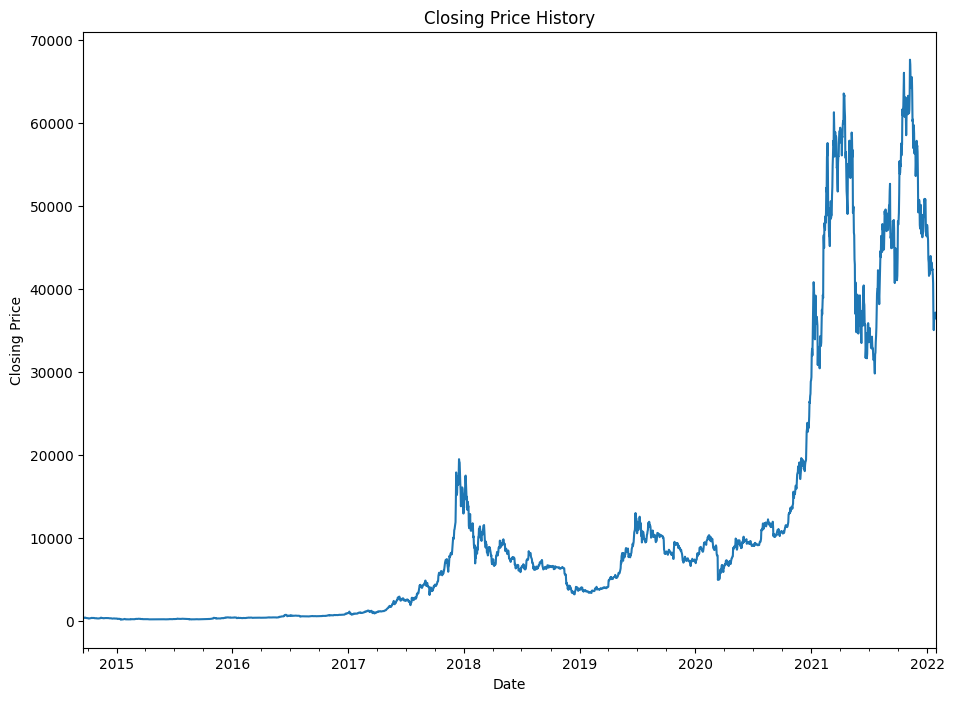

In [31]:
plt.figure(figsize=(11, 8)) # resizing the plot
train_data['Adj Close'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

Syntax dibawah ini digunakan untuk melakukan plot dari setiap kolom yang ada pada dataset. Dari hasil yang di dapatkan hasil kebanyakan dari setiap fiturnya dari tahun ketahun mengalami kenaikan walau sempat mengalami penurunan. Pada bagian plot volume hasil yang didapatkan kecil dan hanya pada bagian tertentu yang mengalami kenaikan. Hal ini terjadi karena tingkat pembelian dari bitcoin tidak cukup banyak karena belum banyak yang tertarik. Pada pertengahan tahun 2021 mengalami kenaikan yang signifikan dikarenakan adanya pengaruh yang menyatakan bahwa jika melakuakan investasi bitcoin adalah sesuatu yang bigdeal.

<Figure size 1600x800 with 0 Axes>

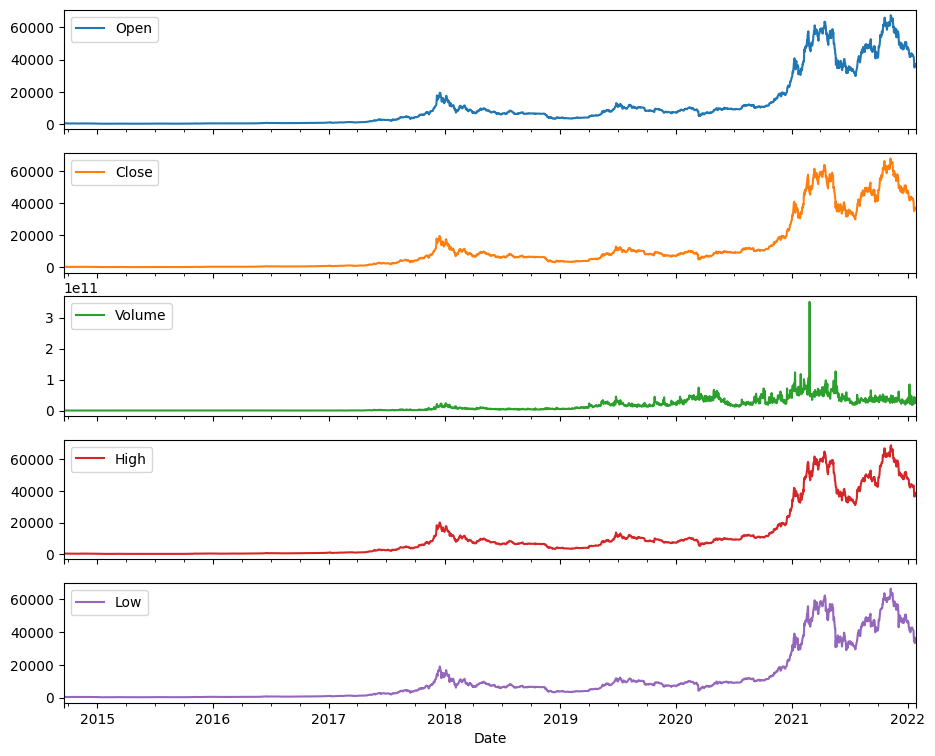

In [32]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

Pada Syntax dibawah ini digunakan untuk menambahkan kolom baru pada data frame yang sudah ada. Data tersebut dimasukan dalam bentuk persentase. Pada kolom 'HL_PCT'merupakan persentase dari perubahan antara harga tertinggi dan harga terendah yang dibagi dengan harga terendah, lalu nilainya dikalikan dengan 100. Hasil akhirnya berupa persentase dari perubahan harga dalam satu hari ataupun dalam satu periode tertentu. Sedangkan untuk kolom 'PCT_change' merupakan perhitungan dari persentase perubahan antara harga penutupan dan harga pembukaan yang akan dibagi dengan harga pembukaan, setelah itu dikalikan dengan 100. Hasil yang didapatkan berupa indikasi tentang nilai dari persentase perubahan harga dari mulai pembukaan samapu penutupan dalam jangka waktu satu hari atau di periode tertentu.

In [33]:
train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0
train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0

Pada syntax dibawah ini digunakan untuk membuat dataframe baru atau yang disebut df. Dataframe ini dibuat dengan tujuan agar data-data penting yang dibutuhkan dan paling relevan untuk digunakan dalam forecasting dapat bersatu dan lebih memudahkan langkah selanjutnya. Dalam dataframe tersebut yaitu terdapat kolom 'HL_PCT', 'PCT_change', 'Adj Close','Volume'.

In [34]:
df = train_data[['HL_PCT', 'PCT_change', 'Adj Close','Volume']]

syntax dibawah ini digunakan untuk melakukan penambahan label baru pada dataframe yang baru yaitu dataframe df. Fungsi dari kolom label ini adalah sebagai target atau variabel yang ingin diprediksi dalam proses yang akan digunakan untuk analisis atau peramalan selanjutnya.

In [35]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['Adj Close'].shift(-forecast_out)

135


<ipython-input-35-8a15e8de9d0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Adj Close'].shift(-forecast_out)


Syntax dibawah ini digunakan untuk melakukan impor dari modul dan fungsi dari pustaka scikit-learn ini. Hasil yang akan didapatkan adalah dapat digunakannya  berbagai model, melakukan penskalaan data, membagi data menjadi subset pelatihan dan pengujian, serta mengukur kinerja model menggunakan metrik tertentu.

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

It’s clear from the plot that there is an overall increase in the trend,with some seasonality in it.

Syntax dibawah ini digunakan untuk melakukan normalisasi data agar data yang didapatkan bisa mengecil nilai bayessnya. Selain itu syntax dibawah ini juga digunakan untuk memastikan bahwa fitur-fitur memiliki skala yang sebanding sehingga tidak ada fitur yang mendominasi dalam pemodelan. Data fitur yang telah diubah skala tersebut kemudian dapat digunakan dalam langkah-langkah selanjutnya seperti pemodelan dan evaluasi. dataframe yang digunakan ada dataframe 'df'

In [37]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-37-7ce179678b12>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


Syntax dibawah ini digunakan untuk melakuakan slicing untuk menentukan nilai dari x. Manfaat lainnya adalah untuk membagi data x menjadi data yang akan diprediksi dan data yang akan digunakan untuk melatih model. Data yang akan diprediksi kan digunakan untuk menguji model pada data yang belum pernah dilihat sebelumnya, sedangkan data yang akan dilatih akan digunakan untuk melatih model untuk membuat prediksi.

In [38]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

Selanjutnya untuk menslicing df yang akan digunakan untuk mencari nilai y digunanakan label yang sebelumnya sudah di running diatas. Fungsi lain dari syntax ini adalah baris-baris yang mengandung nilai yang hilang dihapus dari DataFrame df menggunakan dropna. Kemudian, nilai target yang akan diprediksi diambil dari kolom 'label' yang tersisa dalam DataFrame df. Dengan melakukan hal ini, kita memastikan bahwa data yang digunakan untuk pelatihan dan evaluasi model tidak mengandung nilai yang hilang.

In [39]:
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-39-c3da9adb30d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Syntax dibawah ini digunakan untuk spliting dari data yang sudah tersedia. Data tersebut merupakan data x dan ya.Hal yang lebih rincinya adalah data fitur yang merupakan (X) dan target (y) akan dibagi kedalam empat subset yaitu sebagai berikut, X_train (data fitur untuk pelatihan), X_test (data fitur untuk pengujian), y_train (data target untuk pelatihan), dan y_test (data target untuk pengujian). Subset pelatihan akan digunakan untuk melatih model, sementara subset pengujian akan digunakan untuk menguji kinerja model yang telah dilatih. Proporsi 80:20 (pelatihan dalam contoh ini dapat disesuaikan sesuai kebutuhan.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Syntax dibawah ini digunakan untuk membuat  model regresi linier (lr) yang dilatih dengan data fitur dan target pelatihan, dan kemudian kinerjanya diukur menggunakan data fitur dan target pengujian. Koefisien determinasi (lr_confidence) memberikan informasi tentang seberapa baik model linier dapat memprediksi data target pada subset pengujian yang belum pernah dilihat sebelumnya.

In [41]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

Syntax dibawah ini digunakan untuk mencari score untuk mengukur kinerja model regresi linier (lr) dengan menggunakan data fitur pengujian (X_test) dan data target pengujian (y_test). Hasilnya disimpan dalam variabel lr_confidence. Metode score() mengembalikan koefisien determinasi (R^2) dari model, yang mengindikasikan sejauh mana model dapat menjelaskan variasi dalam data target. Nilai R^2 berkisar antara 0 dan 1, di mana nilai 1 menunjukkan kinerja yang sempurna. score yang didapatkan untuk lr_confidencenya adalah seperti yang ada pada dibawah ini

In [42]:
lr_confidence

0.6931591677581178

Syntax dibawah ini digunakan untuk memebentuk randomforest. rf sebenernya masih menjadi bagian dari regresi yang membedakan hanyalah hasil dari bentuk akhirnya. Model dari Random Forest (rf) dilatih menggunakan data fitur dan target pelatihan, dan kemudian kinerjanya diukur menggunakan data fitur dan target pengujian. Koefisien determinasi (rf_confidence) memberikan informasi tentang seberapa baik model Random Forest dapat memprediksi data target pada subset pengujian yang belum pernah dilihat sebelumnya.

In [43]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

Syntax dibawah ini digunakan untuk menentukan score dari rf_confidence. Metode ini digunakan untuk mengukur kinerja model Random Forest (rf) dengan data fitur pengujian (X_test) dan data target pengujian (y_test). Hasilnya disimpan dalam variabel rf_confidence. Sehingga didapatkan hasil seperti dibawah ini.

In [44]:
rf_confidence

0.9643561376719336

Syntax dibawah ini digunakan untuk memprediksi data masa depan dengan menggunakan model Random Forest. Hasil yang di dapatkan untuk prediksi tersebut ditambahkan ke DataFrame df sebagai kolom 'Forecast' dengan tanggal-tanggal yang sudah di sesuaikan. Kolom-kolom lain dalam DataFrame df pada baris-baris prediksi akan diisi dengan nilai NaN untuk mewakili data yang belum diketahui di masa depan. Data yang diambil menggunakan tanggal terakhir untuk memprediksi nilai di masa depan. Lalu dilakukan konfersi dari last date dengan bantuan library timestamp yang diuabh ke dalam detik dalam satu hari.

In [45]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-45-3eb2aa88d409>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-45-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-45-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len

Syntax dibawah ini digunakan untuk melakukan plot data harga penutupan yang ada (Adj Close) serta data prediksi harga di masa depan (Forecast). Ditambahkannya legenda untuk membedakan kedua garis pada plot, dan label sumbu x dan y diberikan untuk memberikan informasi tentang data yang ditampilkan dalam plot. Akhirnya, plot ditampilkan. Hasil grafik yang bewarna orange merupakan nilai hasil dari forecast yang telah dilakukan terhadap data-data yang ada pada 'df'.

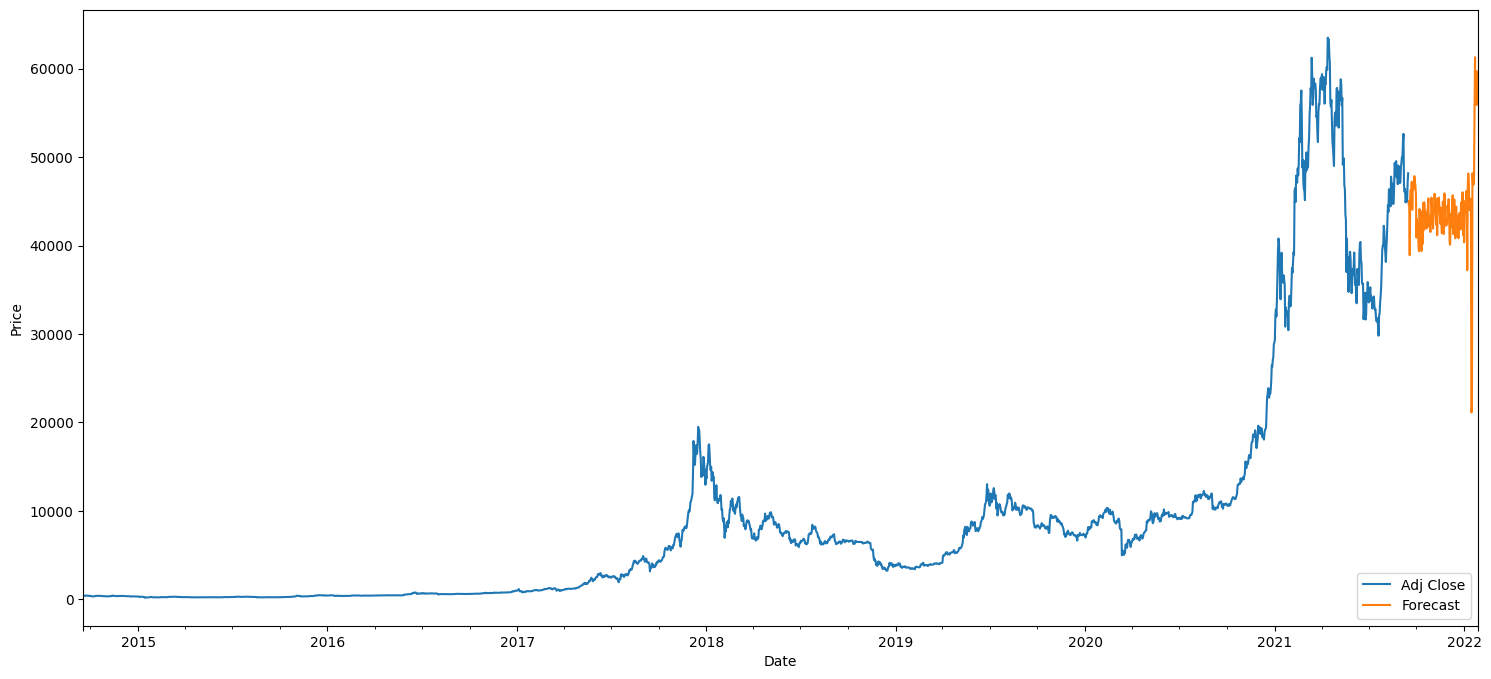

In [46]:
plt.figure(figsize=(18, 8))
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## Clustering

Syntax dibawah ini digunakan untuk melakukan plot dari dataset yang ada memggunakan modul matplotlib.pyplot lalu didapatkan juga dataset sintetis dalam bentuk kelompok-kelompok. KEmudian,  Plot scatter digunakan untuk menampilkan titik-titik dalam dataset, dengan warna hitam dan marker '+'. Akhirnya, plot ditampilkan menggunakan plt.show().

<ipython-input-47-2ff176d9cd33>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


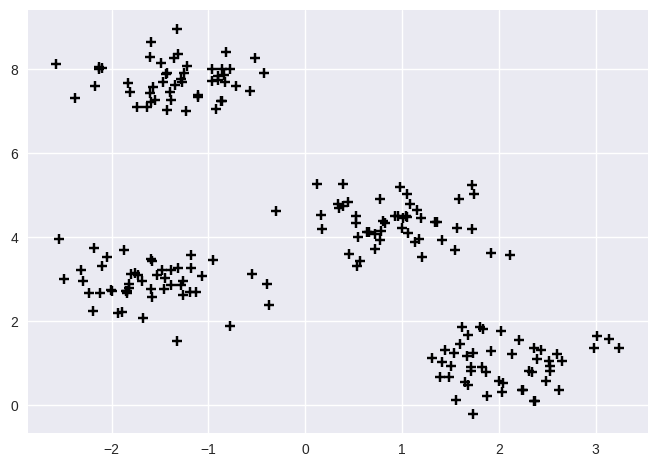

In [47]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
plt.style.use('seaborn')
x, y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=0.5,shuffle=True, random_state=0)
plt.scatter(x[:, 0], x[:, 1], c='k', marker='+', s=50)
plt.show()


syntax dibawah ini menunjukkan bahwa y merupakan kumpulan dari nilai yang diorganisir dalam suatu urutan tertentu yang dapat digunakan dalam suatu tujuan tertentu.  array biasanya digunakan untuk mengorganisir dan mengelompokkan data agar dapat diakses dan dikelola dengan lebih efisien.

In [49]:
y

array([1, 2, 0, 3, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 1, 0, 3, 3, 3, 1, 3, 2,
       1, 2, 1, 1, 3, 1, 1, 0, 3, 0, 2, 1, 2, 0, 2, 0, 0, 3, 3, 3, 3, 0,
       1, 2, 0, 3, 3, 0, 3, 2, 2, 3, 0, 3, 2, 1, 0, 1, 3, 0, 1, 0, 3, 0,
       1, 3, 2, 2, 1, 1, 0, 0, 2, 3, 2, 2, 1, 1, 3, 0, 1, 2, 2, 0, 0, 1,
       2, 2, 3, 3, 3, 0, 0, 1, 2, 3, 0, 0, 3, 1, 1, 3, 3, 2, 0, 1, 1, 0,
       3, 2, 2, 1, 1, 0, 2, 2, 3, 0, 3, 2, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1,
       2, 3, 3, 2, 3, 3, 1, 3, 1, 2, 1, 1, 2, 1, 0, 1, 2, 3, 3, 3, 0, 2,
       1, 0, 3, 2, 3, 1, 3, 1, 1, 2, 2, 3, 0, 1, 1, 2, 1, 0, 2, 3, 3, 3,
       0, 0, 2, 0, 2, 1, 0, 1, 0, 2, 2, 3, 0, 3, 1, 1, 0, 3, 2, 2, 2, 0,
       3, 1])

**1.1 K-means**
1- Randomly select centroids (center of cluster) for each cluster.
2- Calculate the distance of all data points to the centroids.
3- Assign data points to the closest cluster.
4- Find the new centroids of each cluster by taking the mean of all data points in the cluster.
5- Repeat steps 2,3 and 4 until all points converge and cluster centers stop moving

Syntax dibawah ini digunakan untuk membuat clustering menggunakan bantuan algoritma K-Means. Clustering ini digunakan pada data x dengan jumlah cluster sebanyak 4. Sehingga terjadi pengulangan pada langkah ke 4 sebanyak 4 kali. Setiap sampel dalam x akan diberikan label dari cluster yang sesuai. Kemudian, dilakukan plot untuk menampilkan sampel kedalam cluster serta puasat dari cluster.

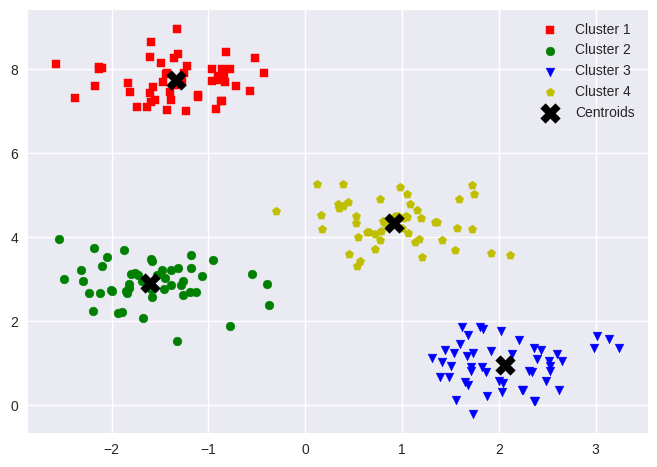

In [50]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, init='random', n_init=10, max_iter=300, tol=1e-04,random_state=0)
y_km = km.fit_predict(x)
plt.scatter(x[y_km==0, 0], x[y_km==0, 1], s=40, c='r', marker='s',label='Cluster 1')
plt.scatter(x[y_km==1, 0], x[y_km==1, 1], s=40, c='g', marker='o',label='Cluster 2')
plt.scatter(x[y_km==2, 0], x[y_km==2, 1], s=40, c='b', marker='v',label='Cluster 3')
plt.scatter(x[y_km==3, 0], x[y_km==3, 1], s=40, c='y', marker='p',label='Cluster 4')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=200,marker='X', c='k', label='Centroids')
plt.legend(scatterpoints=1)
plt.show()


**The Elbow Method**
Theorem: if k increases, the within-cluster SSE (“distortion”) will decrease.
Inertia is calculated by measuring the distance between each data point and its centroid.

Syntax dibawah digunakan untuk melakukan proses iterasi untuk mencoba berbagai jumlah cluster dari 1 hingga 14. Untuk setiap iterasi, dilakukan clustering menggunakan algoritma K-Means dan nilai inertia dari setiap iterasi disimpan dalam list inertias. Setelah iterasi selesai, dilakukan plot dari jumlah cluster versus nilai inertia menggunakan plt.plot. Label sumbu x dan y ditambahkan, dan akhirnya plot ditampilkan menggunakan plt.show(). Plot ini berguna untuk menganalisis dan memilih jumlah cluster yang optimal berdasarkan perubahan nilai inertia.

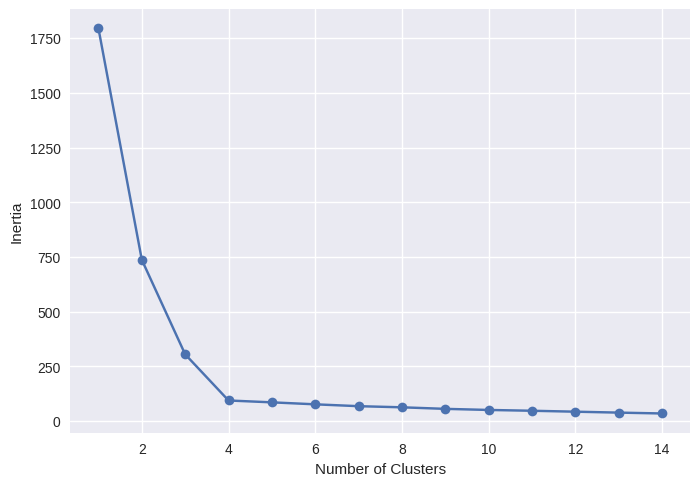

In [51]:
inertias = []
for i in range(1, 15):
  km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04,random_state=0)
  km.fit(x)
  inertias.append(km.inertia_)

plt.plot(range(1,15), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


Another example for KMeans

Syntax dibawah ini digunakan untuk mencoba contoh lain dari KMeans. Hal yang dilakukan adalah pembuatan dataset sintetis menggunakan fungsi make_blobs, yang menghasilkan data dalam bentuk kelompok/clusters. Kemudian, dilakukan scatter plot untuk menampilkan setiap sampel dalam dataset dengan koordinat x dan y yang sesuai.

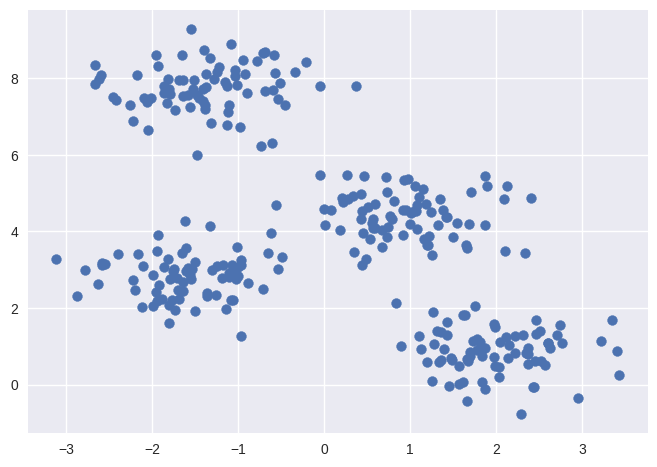

In [52]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,cluster_std=0.60,
random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

Syntax dibawah ini digunakan untuk mendefinisikan cluster menggunakan kmeans. Pada kesempatan kali ini dilakukan clustering pada data X menggunakan algoritma K-Means. Objek kmeans dibuat dengan jumlah cluster yang diinginkan (dalam hal ini 4), dan kemudian proses clustering dilakukan dengan memanggil metode fit pada objek kmeans dengan argumen data X.

In [53]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

Lalu, syntax dibawah ini digunakan untuk menampilkan plot scatter yang menggambarkan setiap sampel dalam data X dengan warna yang menunjukkan keanggotaan cluster yang diprediksi. Pusat-pusat cluster juga ditampilkan dalam plot dengan marker berwarna merah.

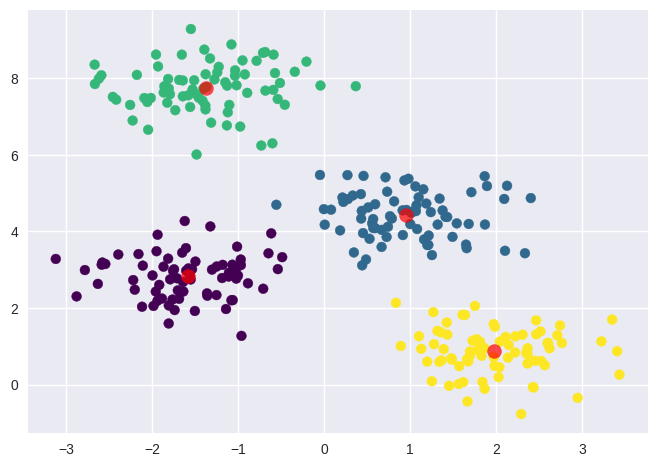

In [54]:
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
pusat = kmeans.cluster_centers_
plt.scatter(pusat[:, 0], pusat[:, 1], c='red', s=100, alpha=0.7);

Syntax dibawah ini berfungsi untuk menjelaskan bahwa akan dilakukan clustering dengan menggunakan algoritma K-Means dan membentuk 6 cluster yang berbeda.

In [55]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)

Lalu syntax dibawah ini dilakukan untuk melakukan proses iterasi

In [56]:
inersia = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  inersia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Setelah itu dilakukan plot dari hasil iterasi yang telah dilakukan

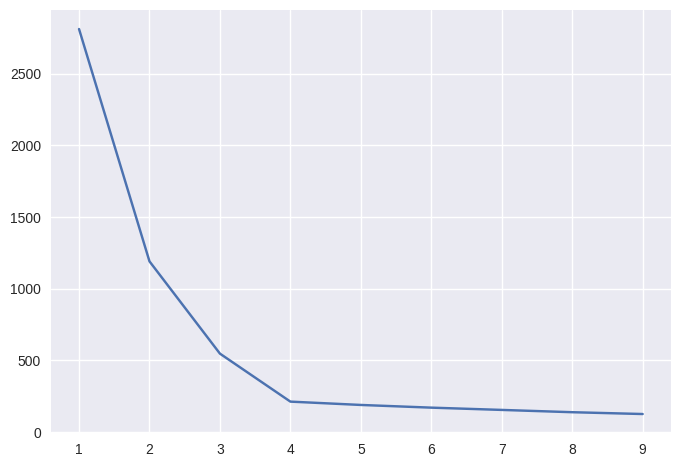

In [57]:
plt.plot(range(1,10),inersia)
plt.show()

KMean6 with 6 cluster

Syntax dibawah ini berfungsi untuk dilakukannya pembuatan dataset sintetis menggunakan fungsi make_moons, yang menghasilkan data dalam bentuk dua setengah lingkaran (moons). Variabel X berisi koordinat dari setiap sampel, sedangkan variabel y berisi label kelas/target yang sesuai.

In [58]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

Syntax dibawah ini dilakukan untuk melakukan penggambaran dalam bentuk plot

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


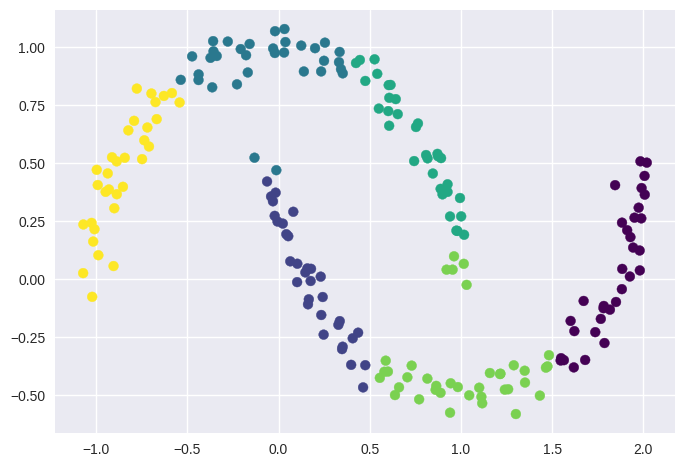

In [59]:
label = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=label, s=50, cmap='viridis');

**Spectral Clustering**

Syntax dibawah ini dilakuakn untuk clustering pada data X menggunakan algoritma spectral clustering. Objek model dibuat dengan jumlah cluster yang diinginkan, dan kemudian proses clustering dilakukan dengan memanggil metode fit_predict pada objek model dengan argumen data X. Hasil clustering ditampilkan dalam plot scatter dengan setiap sampel diberi warna sesuai dengan cluster yang diprediksi.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


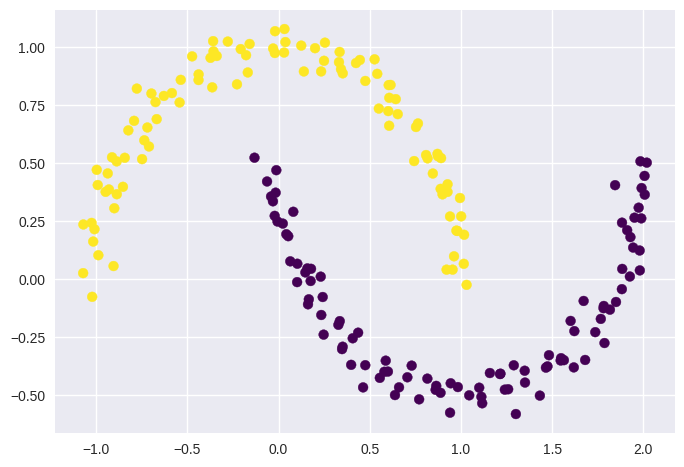

In [60]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

**DBScan**

Syntax dibawah ini dilakukan untuk clustering pada data x menggunakan algoritma DBSCAN. Data x diubah terlebih dahulu dengan melakukan standardisasi menggunakan objek scaler. Objek dbscan dibuat dengan parameter-parameter yang diinginkan dan kemudian proses clustering dilakukan dengan memanggil metode fit_predict pada objek dbscan dengan argumen data newX. Hasil clustering ditampilkan dalam plot scatter dengan setiap sampel diberi warna sesuai dengan cluster yang diprediksi oleh y_db.

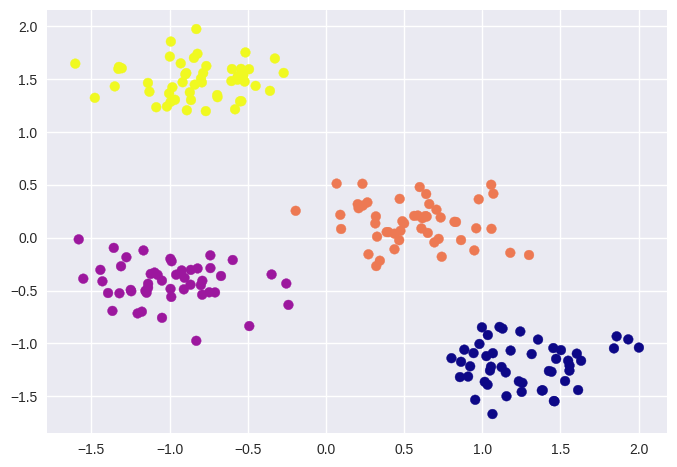

In [61]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
newX = scaler.fit_transform(x)
dbscan = DBSCAN(eps=0.35, min_samples=3)
y_db = dbscan.fit_predict(newX)
plt.scatter(newX[:,0], newX[:,1], c=y_db, cmap='plasma')
plt.show()


Syntax dibawah ini tidak jauh beda dengan syntax diatas yaitu  dilakukan langkah-langkah yang serupa dengan sebelumnya untuk melakukan clustering dengan menggunakan algoritma DBSCAN. Terdapat perbedaan pada nilai parameter min_samples yang digunakan dalam objek DBSCAN. Dengan langkah-langkah yang dilakukan pada syntax dibawah ini, dilakukan clustering pada data x menggunakan algoritma DBSCAN. Data x diubah terlebih dahulu dengan melakukan standardisasi menggunakan objek scaler. Objek dbscan dibuat dengan parameter-parameter yang diinginkan dan kemudian proses clustering dilakukan dengan memanggil metode fit_predict pada objek dbscan dengan argumen data newX. Hasil clustering ditampilkan dalam plot scatter dengan setiap sampel diberi warna sesuai dengan cluster yang diprediksi oleh y_db.

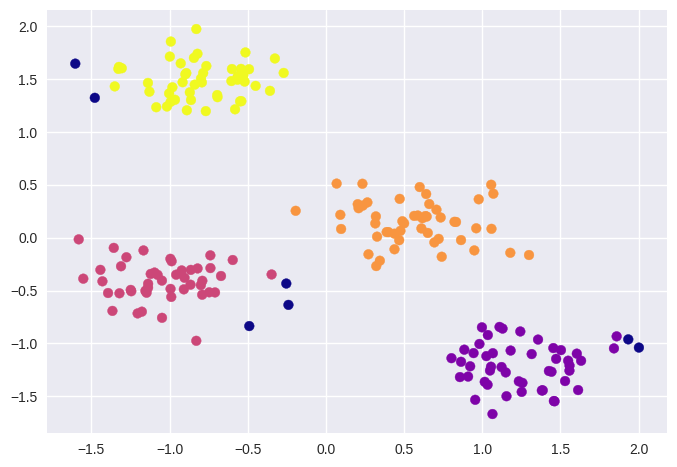

In [62]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
newX = scaler.fit_transform(x)
dbscan = DBSCAN(eps=0.35, min_samples=10)
y_db = dbscan.fit_predict(newX)
plt.scatter(newX[:,0], newX[:,1], c=y_db, cmap='plasma')
plt.show()
